In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
x_train, x_test = x_train /255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
y_train

array([19, 29,  0, ...,  3,  7, 73])

In [5]:
# Get number of available classes
K = len(set(y_train))

In [6]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [7]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics =['accuracy'])

In [8]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs= 50)

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 3.8162 - accuracy: 0.1416 - val_loss: 3.1715 - val_accuracy: 0.2381
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 3.0270 - accuracy: 0.2586 - val_loss: 2.9010 - val_accuracy: 0.2890
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.6094 - accuracy: 0.3378 - val_loss: 2.5101 - val_accuracy: 0.3581
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3047 - accuracy: 0.4031 - val_loss: 2.3186 - val_accuracy: 0.4066
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0668 - accuracy: 0.4531 - val_loss: 2.1810 - val_accuracy: 0.4322
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8825 - accuracy: 0.4932 - val_loss: 2.0578 - val_accuracy: 0.4604
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7203 - accuracy: 0.5272 - val_loss: 2.0728 - val_acc

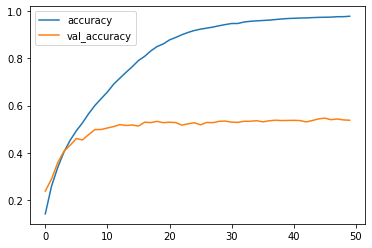

In [9]:
history = model.history.history
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.legend()

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 2.5747 - accuracy: 0.5378


[2.5746636390686035, 0.5378000140190125]

In [11]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [12]:
print('Confusion Matrix:')
print(tf.math.confusion_matrix(predictions, y_test))

Confusion Matrix:
tf.Tensor(
[[80  0  2 ...  0  1  0]
 [ 0 69  1 ...  0  0  0]
 [ 0  1 34 ...  0  7  1]
 ...
 [ 0  0  2 ... 57  0  0]
 [ 2  0  5 ...  0 31  0]
 [ 0  1  0 ...  0  0 57]], shape=(100, 100), dtype=int32)


In [13]:
wrong_predictions_indexes = np.where(np.array(predictions == y_test) == False)[0]

index:3143
predicted value: 3, Actual value:4


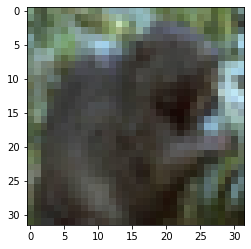

In [14]:
index = np.random.choice(wrong_predictions_indexes)
plt.imshow(x_test[index])
print(f'index:{index}')
print(f'predicted value: {predictions[index]}, Actual value:{y_test[index]}')

In [15]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 23s 15ms/step - loss: 2.0091 - accuracy: 0.5053 - val_loss: 2.0723 - val_accuracy: 0.4911
Epoch 2/50
1562/1562 [==============================] - 23s 15ms/step - loss: 1.7391 - accuracy: 0.5408 - val_loss: 1.9058 - val_accuracy: 0.5188
Epoch 3/50
1562/1562 [==============================] - 23s 15ms/step - loss: 1.6380 - accuracy: 0.5614 - val_loss: 1.8876 - val_accuracy: 0.5162
Epoch 4/50
1562/1562 [==============================] - 23s 15ms/step - loss: 1.5626 - accuracy: 0.5766 - val_loss: 1.8271 - val_accuracy: 0.5254
Epoch 5/50
1562/1562 [==============================] - 24s 15ms/step - loss: 1.4922 - accuracy: 0.5907 - val_loss: 1.7585 - val_accuracy: 0.5405
Epoch 6/50
1562/1562 [==============================] - 23s 15ms/step - loss: 1.4298 - accuracy: 0.6063 - val_loss: 1.7516 - val_accuracy: 0.5428
Epoch 7/50
1562/1562 [==============================] - 19s 12ms/step - loss: 1.3938 - accuracy: 0.6112 - val_loss: 1.7484 -